In [2]:
import optuna
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice


In [5]:
study = optuna.create_study(study_name="optuna-study-linear", direction="minimize", storage='sqlite:///_optuna-study-linear.db', load_if_exists=True)

[I 2022-09-25 08:04:13,440] Using an existing study with name 'optuna-study-linear' instead of creating a new one.


In [8]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

/tmp/ipykernel_552831/1379015102.py:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  res = plot_optimization_history(study)


<Figure size 432x288 with 0 Axes>

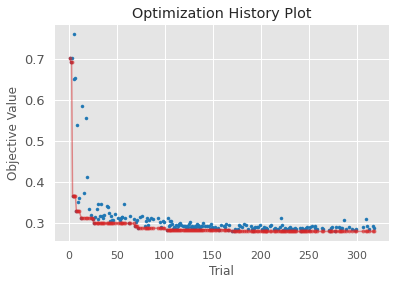

In [13]:
matplotlib.rcParams['lines.markersize'] = 3.0
fig = plt.figure()


res = plot_optimization_history(study)
fig.tight_layout()

res.legend().remove()

for label in (res.get_yticklabels()+ res.get_yticklabels()):
	label.set_fontsize(13)


plt.savefig('hyper_tuning_conv.pdf', format="pdf", bbox_inches="tight")

In [ ]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

/tmp/ipykernel_552831/707271051.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  res = plot_param_importances(study)


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (15).

<Figure size 432x288 with 0 Axes>

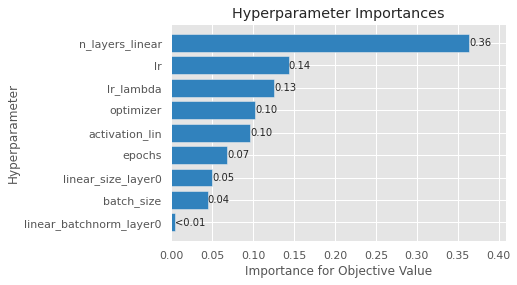

In [6]:
matplotlib.rcParams['lines.markersize'] = 3.0
fig = plt.figure()


res = plot_param_importances(study)
fig.tight_layout()

ticks = ["lrs-cnv", "kernel-l0", "optim", "lr", "activ-lin", "activ-cnv", "cnv-nrm-l0", "batch", "cnv-size-l0", "lrs-linear", "lin-size-l0", "lr-lambda", "epochs", "lin-norm-l0", "pool"]
ticks.reverse()
res.set_yticklabels(ticks)

#ticks = ["lrs-lin", "lr-lambda", "lr", "epochs", "activ-lin", "batch", "optim", "lin-size-l0", "norm-l0"]
#ticks.reverse()
#res.set_yticklabels(ticks)

for label in (res.get_yticklabels()+ res.get_yticklabels()):
	label.set_fontsize(13)

plt.ylabel("")

plt.savefig('hyper_importances_mlp.pdf', format="pdf", bbox_inches="tight")


In [ ]:
matplotlib.rcParams['lines.markersize'] = 3.0
fig = plt.figure()


plot_slice(study, params=["linear_size_layer0"])

plt.savefig('linear_size_cnn.pdf', format="pdf", bbox_inches="tight")

In [ ]:
fig = optuna.visualization.plot_contour(study, ["lr", "optimizer"])
fig.show()

In [ ]:
matplotlib.rcParams['lines.markersize'] = 3.0
fig = plt.figure()


plot_contour(study, ["lr", "optimizer"])
fig.tight_layout()


In [ ]:
fig = optuna.visualization.plot_contour(study, ["lr", "batch_size"])
fig.show()

In [ ]:
fig = optuna.visualization.plot_contour(study, ["n_layers_linear", "n_layers_blocks"])
fig.show()

In [ ]:
study.best_params.items()

In [7]:
study.best_trial

FrozenTrial(number=30, values=[0.25591892500718433], datetime_start=datetime.datetime(2022, 9, 25, 8, 0, 53, 45802), datetime_complete=datetime.datetime(2022, 9, 25, 8, 0, 56, 763813), params={'activation_lin': 'ReLU', 'batch_size': 112, 'epochs': 2, 'linear_batchnorm_layer0': False, 'linear_batchnorm_layer1': False, 'linear_size_layer0': 1370, 'linear_size_layer1': 880, 'lr': 0.001051905292972931, 'lr_lambda': 0.6837203763543799, 'n_layers_linear': 2, 'optimizer': 'Adam'}, distributions={'activation_lin': CategoricalDistribution(choices=('LeakyReLU', 'ReLU', 'ELU')), 'batch_size': IntDistribution(high=128, log=False, low=16, step=16), 'epochs': IntDistribution(high=3, log=False, low=1, step=1), 'linear_batchnorm_layer0': CategoricalDistribution(choices=(True, False)), 'linear_batchnorm_layer1': CategoricalDistribution(choices=(True, False)), 'linear_size_layer0': IntDistribution(high=3000, log=False, low=100, step=10), 'linear_size_layer1': IntDistribution(high=3000, log=False, low=10

In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np

In [ ]:
all_vals_lin = np.array([])

for iter in range(9):
    event_acc = EventAccumulator('runs_fcn/' + str(iter))
    event_acc.Reload()
    w_times, step_nums, vals = zip(*event_acc.Scalars('Loss/test'))
    all_vals_lin = np.append(all_vals_lin, np.array(vals))

In [ ]:
all_vals_conv = np.array([])

for iter in range(9):
    event_acc = EventAccumulator('runs_cnn/' + str(iter))
    event_acc.Reload()
    w_times, step_nums, vals = zip(*event_acc.Scalars('Loss/test'))
    all_vals_conv = np.append(all_vals_conv, np.array(vals))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_vals_lin)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.savefig('train_loss_lin.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_vals_conv)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.savefig('train_loss_conv.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
all_vals_lin_batch = np.array([])

for iter in range(9):
    event_acc = EventAccumulator('runs_fcn/' + str(iter))
    event_acc.Reload()
    w_times, step_nums, vals = zip(*event_acc.Scalars('BatchLoss/train'))
    all_vals_lin_batch = np.append(all_vals_lin_batch, np.array(vals))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_vals_lin_batch)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()